In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import csv
import statistics
from statistics import mode


# HAPPINESS DATA VISUALIZATION

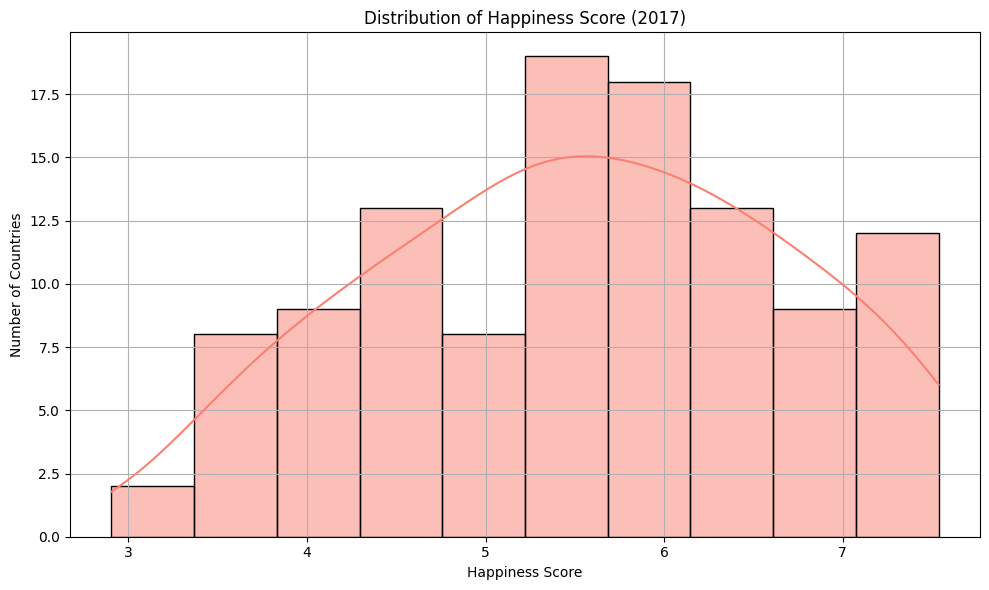

In [23]:

plt.figure(figsize=(10, 6))
sns.histplot(final_scores, bins=10, kde=True, color='salmon', edgecolor='black')
plt.title("Distribution of Happiness Score (2017)")
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()



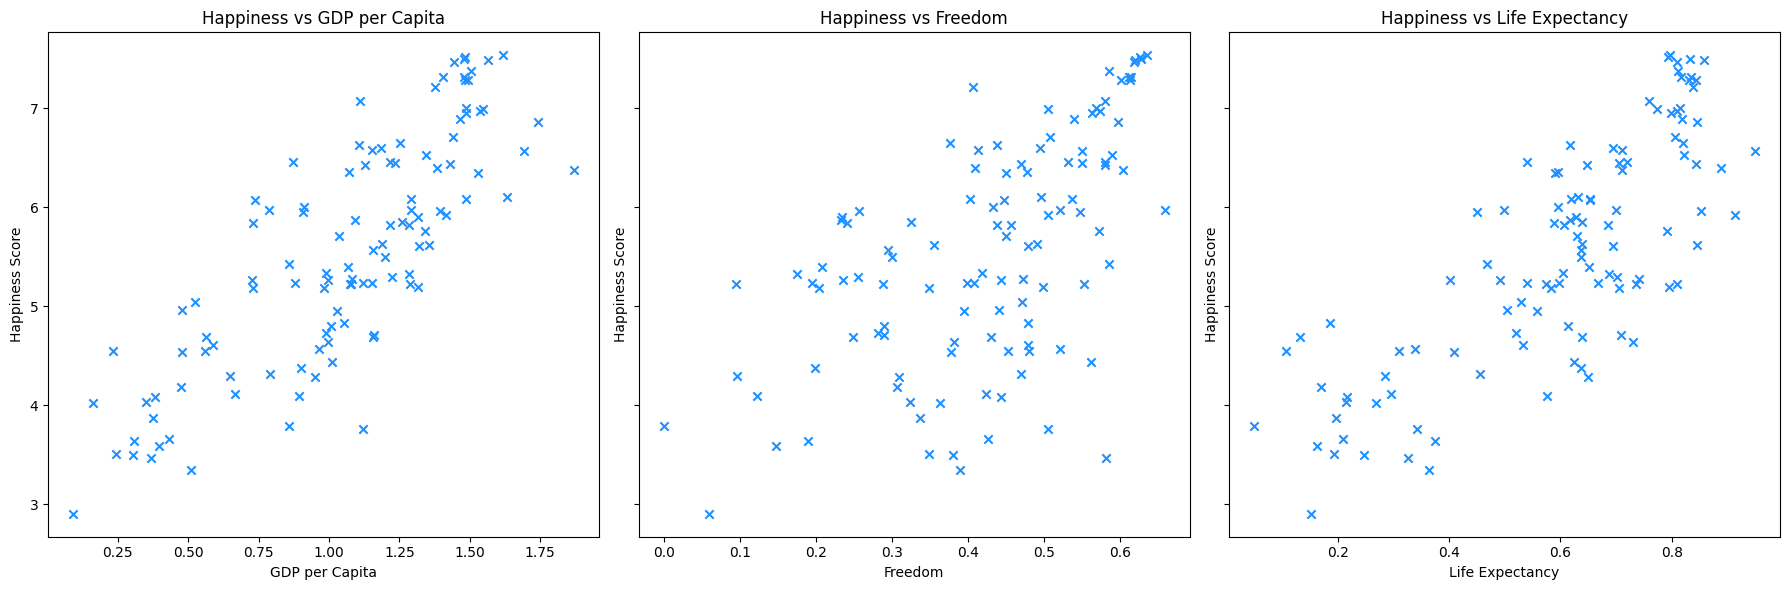

In [24]:
#Scatter plot with happiness variables


# Filter and align happiness data for only the matched countries
happiness_filtered = happiness_df[happiness_df["Country"].isin(final_countries)]

# Prepare X variables and Y (Happiness Score)
gdp = happiness_filtered["Economy..GDP.per.Capita."].astype(float).tolist()
freedom = happiness_filtered["Freedom"].astype(float).tolist()
life_exp = happiness_filtered["Health..Life.Expectancy."].astype(float).tolist()
happy = happiness_filtered["Happiness.Score"].astype(float).tolist()
countries_scatter = happiness_filtered["Country"].tolist()

# Set up scatter plots for each factor
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

factors = [gdp, freedom, life_exp]
labels = ["GDP per Capita", "Freedom", "Life Expectancy"]

for ax, x, label in zip(axes, factors, labels):
    ax.scatter(x, happy, color="dodgerblue", marker='x')
    ax.set_xlabel(label)
    ax.set_ylabel("Happiness Score")
    ax.set_title(f"Happiness vs {label}")


plt.tight_layout()
plt.show()


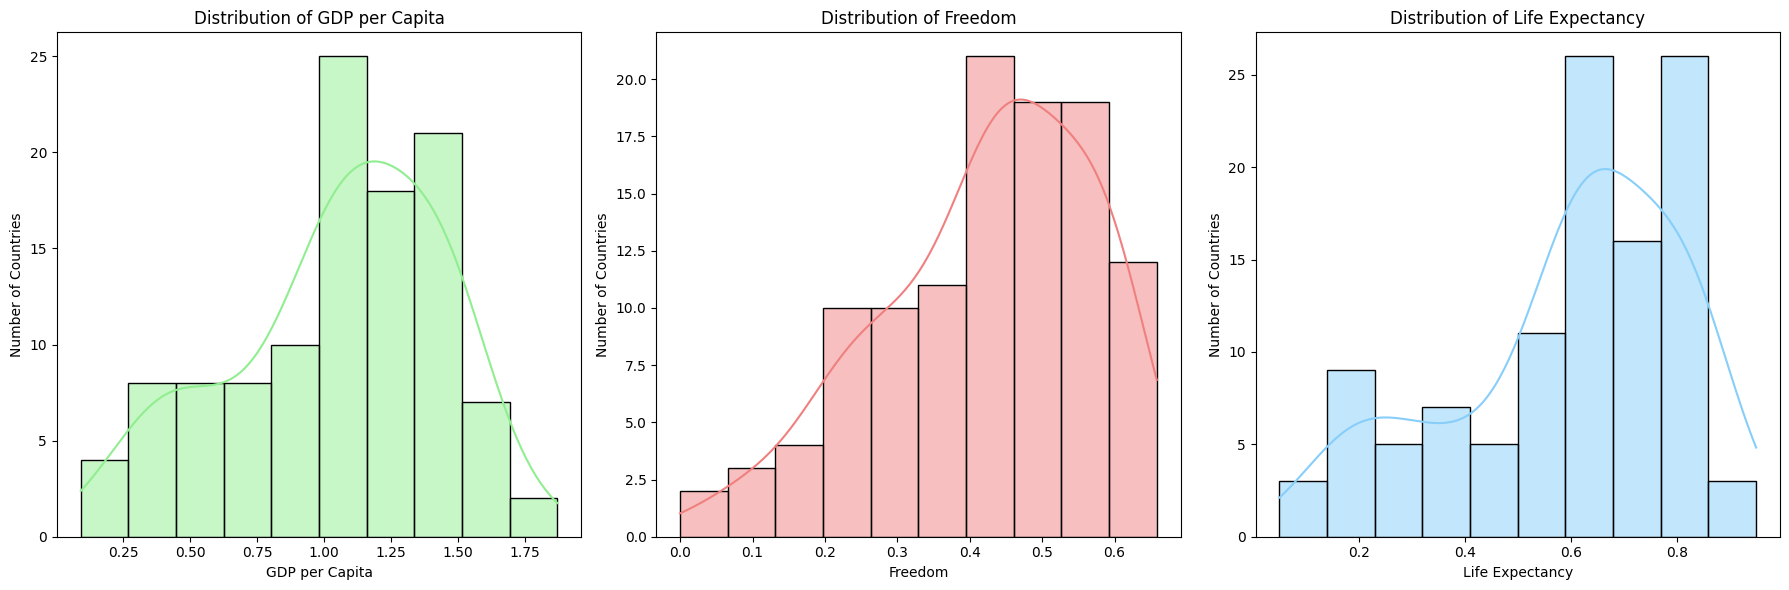

In [25]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables = [gdp, freedom, life_exp]
labels = ["GDP per Capita", "Freedom", "Life Expectancy"]
colors = ["lightgreen", "lightcoral", "lightskyblue"]

for ax, data, label, color in zip(axes, variables, labels, colors):
    sns.histplot(data, bins=10, kde=True, color=color, edgecolor='black', ax=ax)
    ax.set_title(f"Distribution of {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Number of Countries")

plt.tight_layout()
plt.show()


# TERTIARY ENROLLMENT DATA VISUALIZATIONS

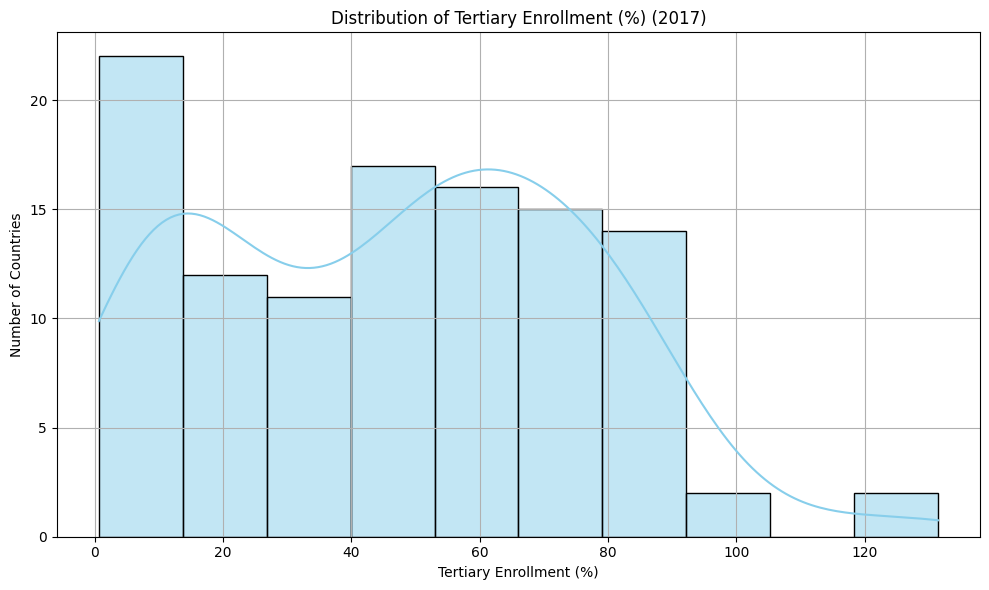

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(final_enrollments, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Tertiary Enrollment (%) (2017)")
plt.xlabel("Tertiary Enrollment (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()


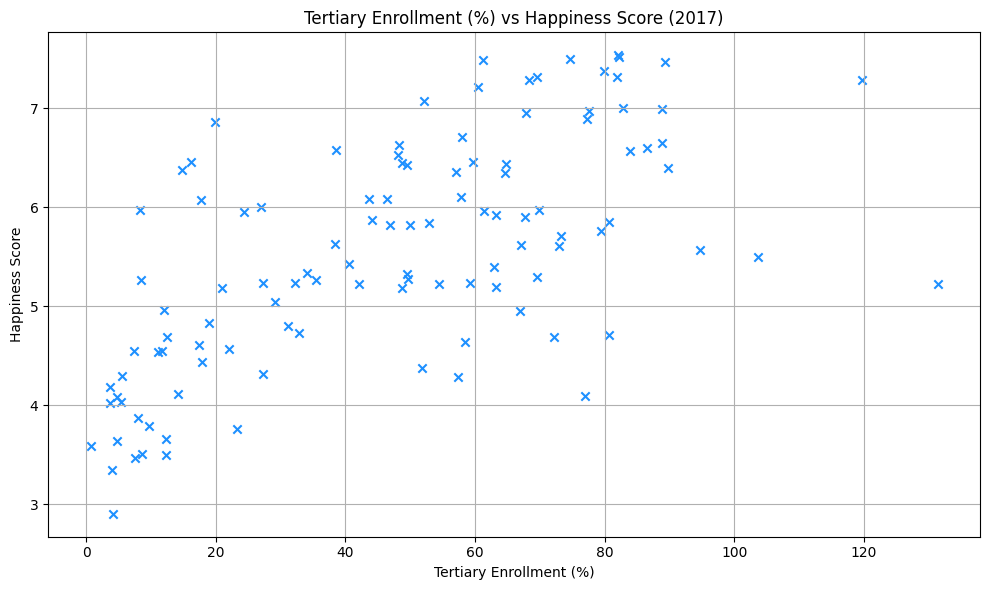

In [6]:


# Read the World Happiness dataset
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")

# Initialize lists to store country names and their tertiary enrollment values
countries = []
enrollments = []

# Read the tertiary enrollment data file
with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Parse lines starting from line 6 (skip metadata and headers)
for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if len(parts) > 61:
        try:
            value = float(parts[61].strip().strip('"'))  # Index 61 corresponds to 2017
            countries.append(country)
            enrollments.append(value)
        except ValueError:
            continue  # Skip rows with invalid or missing values

# Match countries with those in the Happiness dataset
matched_countries = set(happiness_df["Country"].str.strip())
final_countries = []
final_enrollments = []
final_scores = []

# Cross-match country names and collect corresponding happiness scores
for country, enr in zip(countries, enrollments):
    row = happiness_df[happiness_df["Country"] == country]
    if not row.empty:
        score = float(row["Happiness.Score"].values[0])
        final_countries.append(country)
        final_enrollments.append(enr)
        final_scores.append(score)

# Create a scatter plot of Tertiary Enrollment vs Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(final_enrollments, final_scores, color='dodgerblue', marker='x')
plt.title("Tertiary Enrollment (%) vs Happiness Score (2017)")
plt.xlabel("Tertiary Enrollment (%)")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


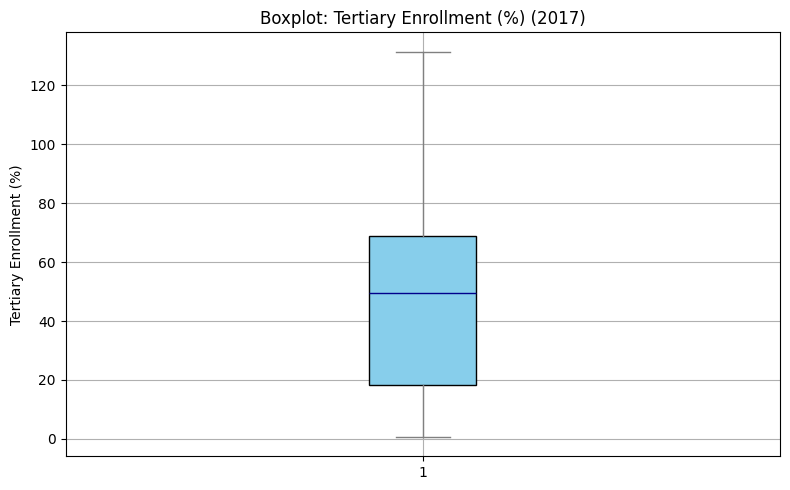

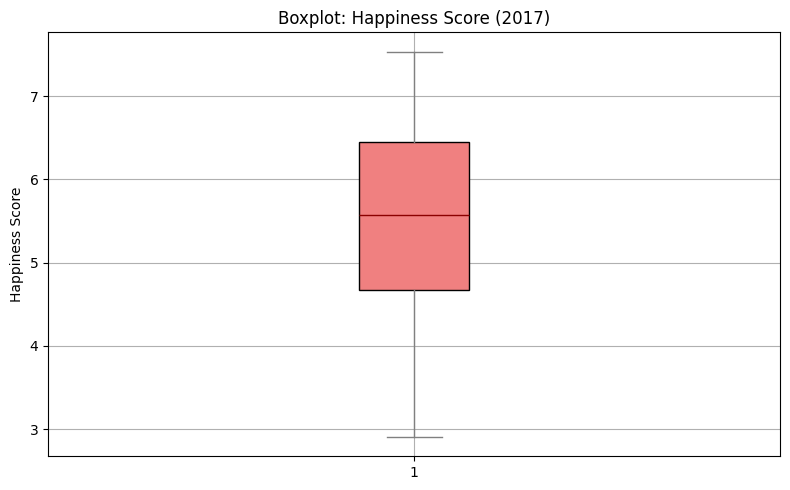

In [8]:

# Load happiness data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Reload tertiary data
with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Get countries with tertiary enrollment and happiness
final_countries = []
final_enrollments = []
final_scores = []

for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > 61:
        try:
            enrollment = float(parts[61].strip().strip('"'))
            score_row = happiness_df[happiness_df["Country"] == country]
            if not score_row.empty:
                score = float(score_row["Happiness.Score"].values[0])
                final_countries.append(country)
                final_enrollments.append(enrollment)
                final_scores.append(score)
        except:
            continue



# Boxplot: Tertiary Enrollment separately
plt.figure(figsize=(8, 5))
plt.boxplot(final_enrollments, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Tertiary Enrollment (%) (2017)")
plt.ylabel("Tertiary Enrollment (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Happiness Score separately
plt.figure(figsize=(8, 5))
plt.boxplot(final_scores, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='darkred'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Happiness Score (2017)")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


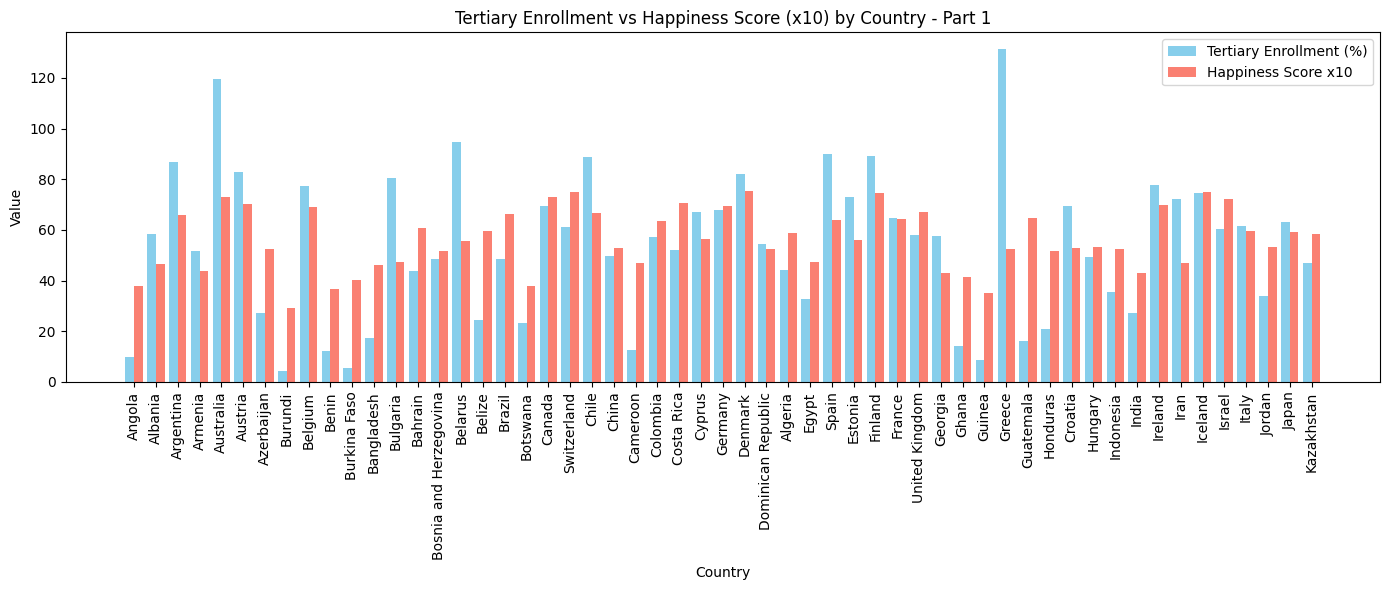

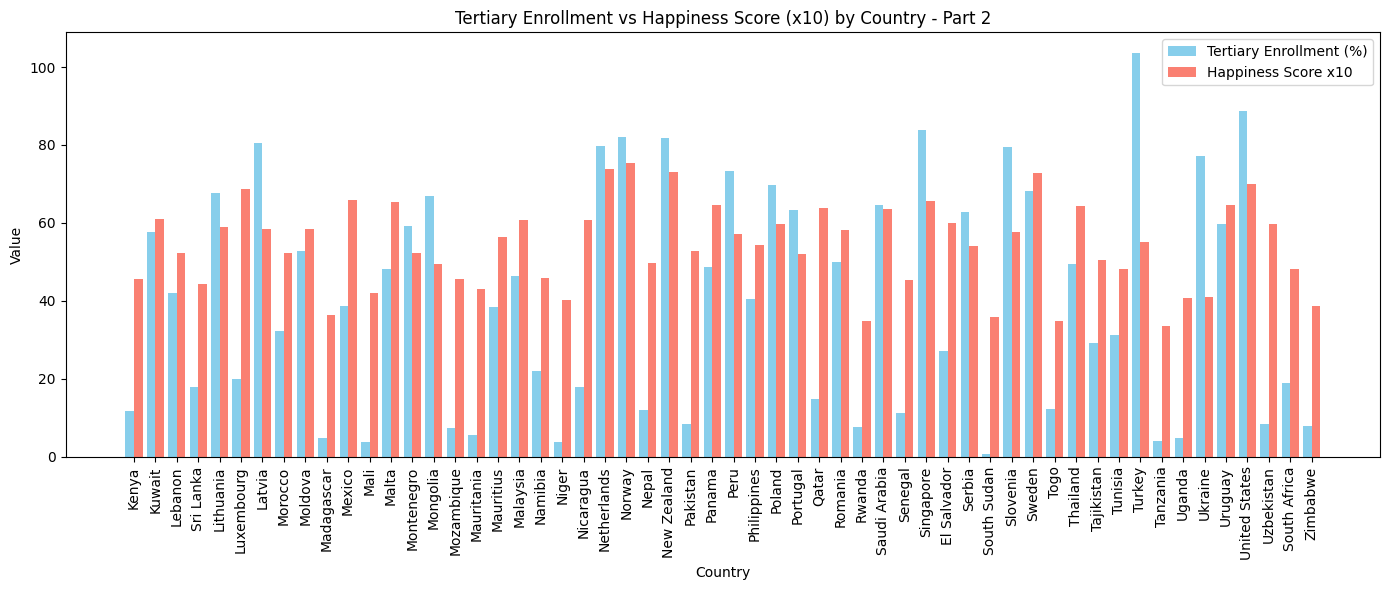

In [13]:
#Bar chart with tertiary enrollment and happiness score with 2 part

split_index = len(final_countries) // 2

country_splits = [final_countries[:split_index], final_countries[split_index:]]
enrollment_splits = [final_enrollments[:split_index], final_enrollments[split_index:]]
score_splits = [final_scores[:split_index], final_scores[split_index:]]

for i in range(2):
    x = np.arange(len(country_splits[i]))
    scaled_scores = [s * 10 for s in score_splits[i]]

    plt.figure(figsize=(14, 6))
    plt.bar(x - 0.2, enrollment_splits[i], width=0.4, label="Tertiary Enrollment (%)", color="skyblue")
    plt.bar(x + 0.2, scaled_scores, width=0.4, label="Happiness Score x10", color="salmon")

    plt.xticks(ticks=x, labels=country_splits[i], rotation=90)
    plt.title(f"Tertiary Enrollment vs Happiness Score (x10) by Country - Part {i+1}")
    plt.xlabel("Country")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ADULT LITERACY RATE VISUALIZATIONS

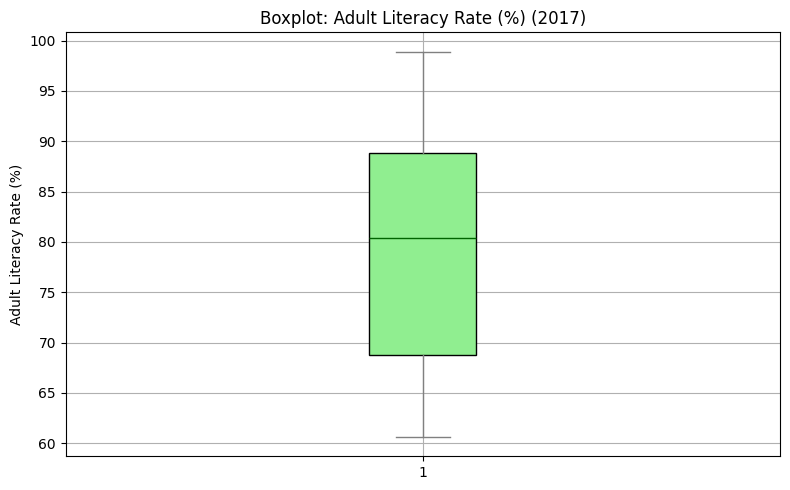

In [10]:
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Find header and index of 2017
for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

# Match with happiness countries
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Extract literacy values for matched countries
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            literacy_rates.append(value)
        except ValueError:
            continue

# Plot boxplot for literacy
plt.figure(figsize=(8, 5))
plt.boxplot(literacy_rates, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Adult Literacy Rate (%) (2017)")
plt.ylabel("Adult Literacy Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


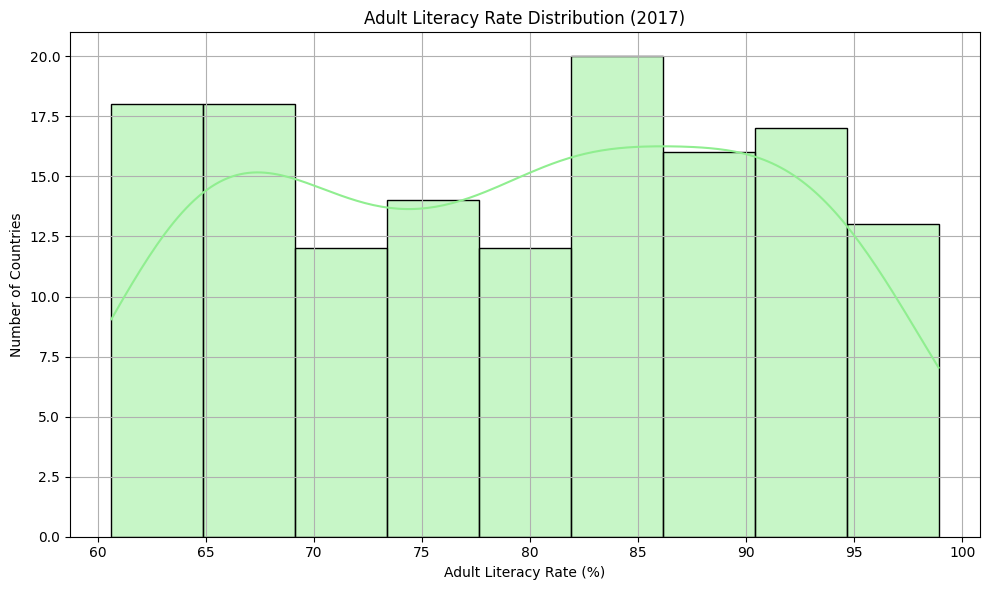

In [12]:


# Plot  the KDE + Histogram for Adult Literacy Rate
plt.figure(figsize=(10, 6))
sns.histplot(literacy_rates, kde=True, color='lightgreen', edgecolor='black')

plt.title("Adult Literacy Rate Distribution (2017)")
plt.xlabel("Adult Literacy Rate (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()


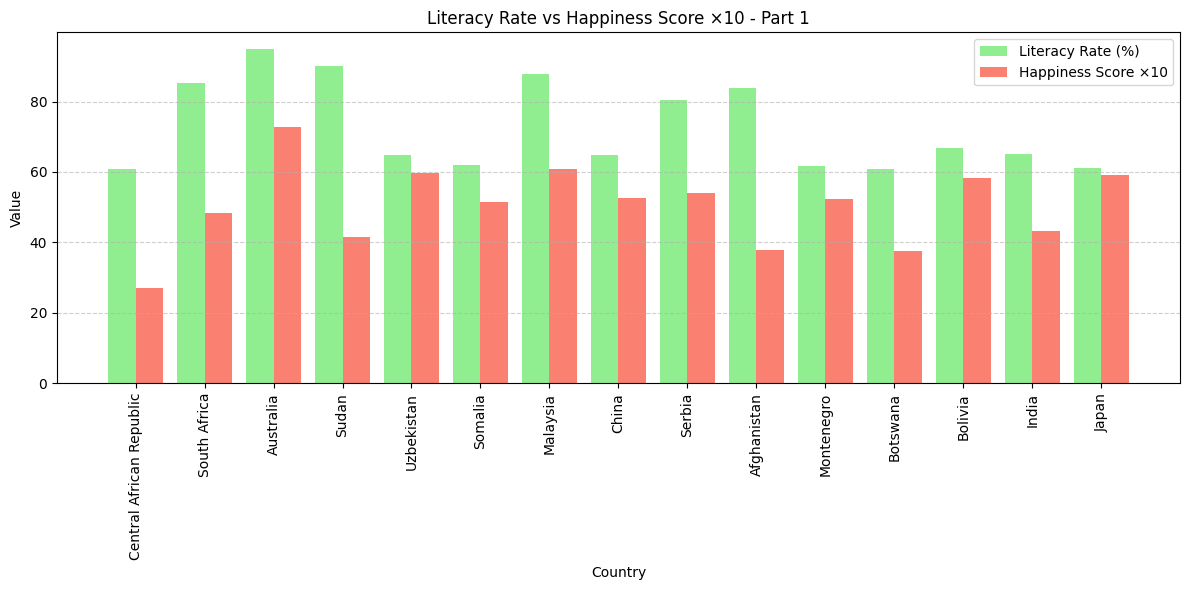

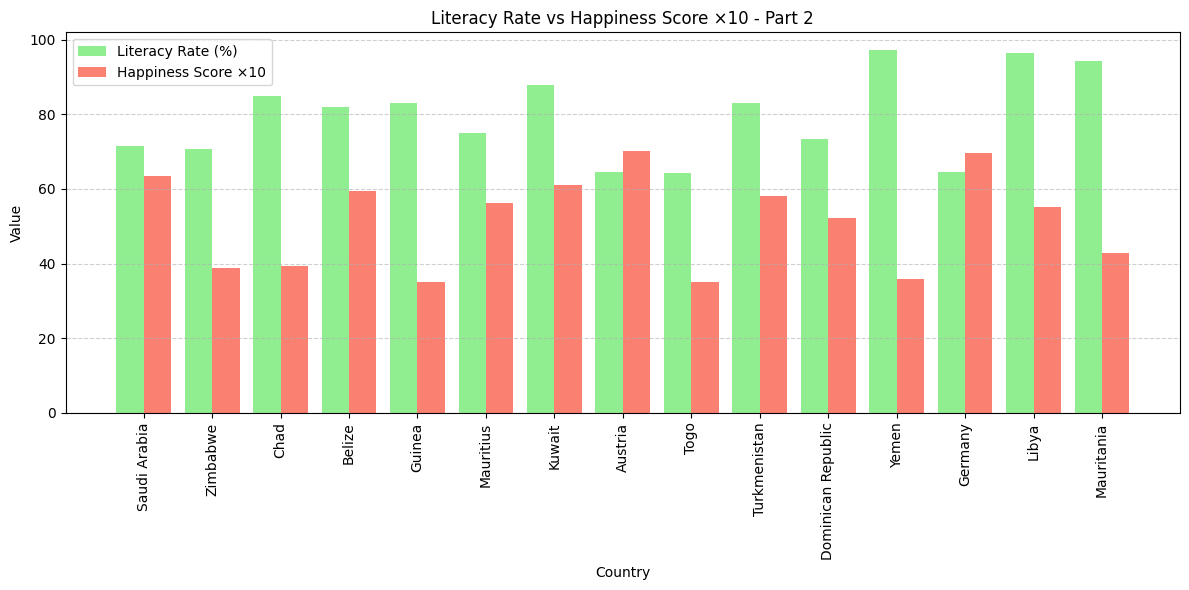

In [20]:


def plot_part(data, title):
    labels, literacy, happiness = zip(*data)
    x = np.arange(len(labels))
    bar_width = 0.4

    plt.figure(figsize=(12, 6))
    plt.bar(x - bar_width/2, literacy, width=bar_width, label="Literacy Rate (%)", color='lightgreen')
    plt.bar(x + bar_width/2, happiness, width=bar_width, label="Happiness Score ×10", color='salmon')

    plt.xticks(x, labels, rotation=90)
    plt.xlabel("Country")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot them
plot_part(part1, "Literacy Rate vs Happiness Score ×10 - Part 1")
plot_part(part2, "Literacy Rate vs Happiness Score ×10 - Part 2")


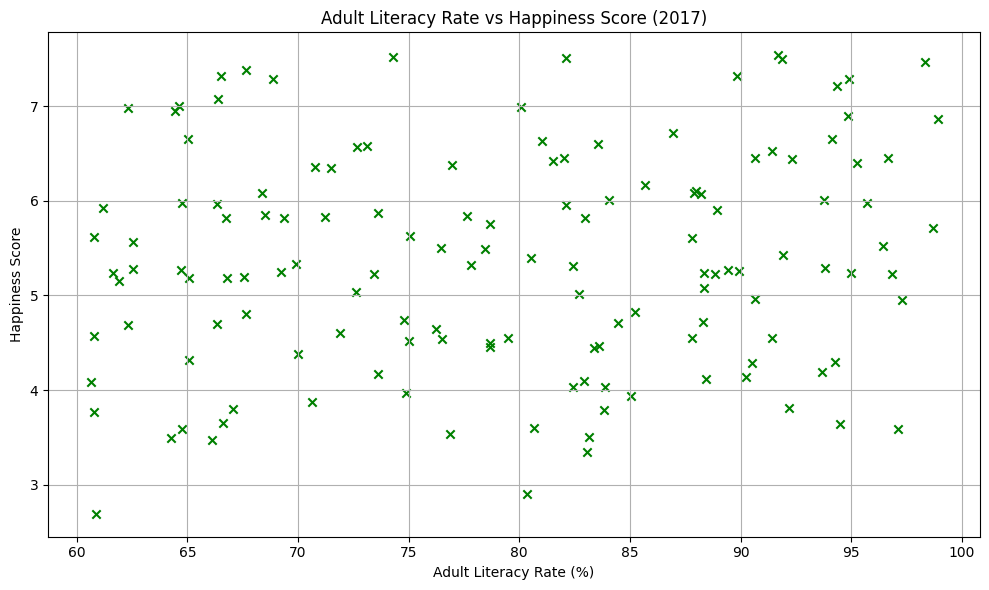

In [22]:


# Plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(literacy_rates, happy_scores, color="green", marker='x')
plt.title("Adult Literacy Rate vs Happiness Score (2017)")
plt.xlabel("Adult Literacy Rate (%)")
plt.ylabel("Happiness Score")
plt.grid(True)



plt.tight_layout()
plt.show()


# FOREST AREA DATA VISUALIZATON

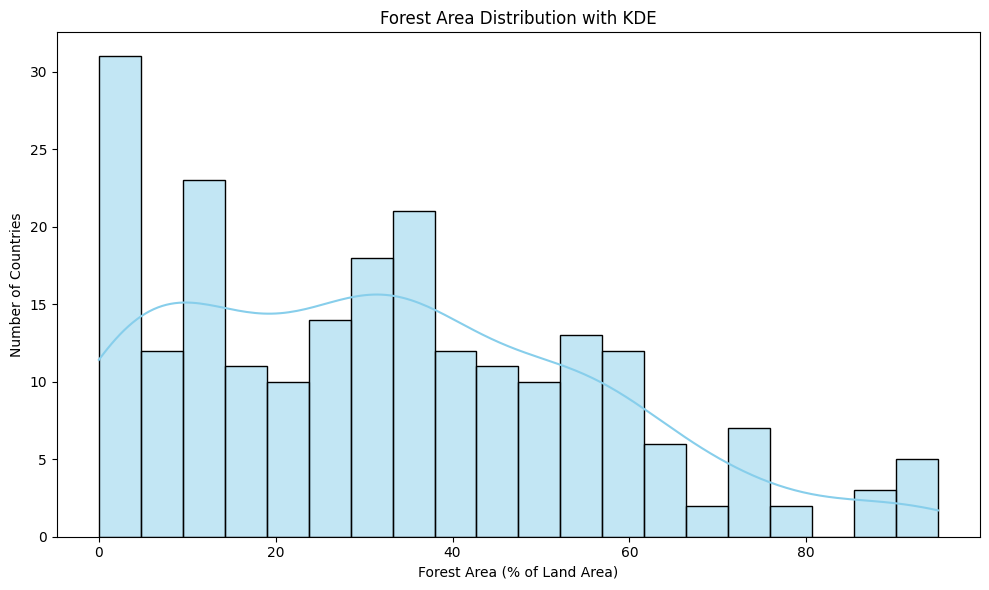

In [42]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns

countries = []
forest_areas = []

with open("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()[5:]  # skip metadata and header

    for line in lines:
        parts = line.strip().split(",")

        if len(parts) > 61:
            country = parts[0].replace('""', '').replace('"', '').strip()
            value = parts[61].replace('""', '').replace('"', '').strip()

            if value and not any(keyword.lower() in country.lower() for keyword in [
                "World", "income", "region", "developing", "countries", "Africa", "Europe",
                "Asia", "Middle East", "Arab", "Caribbean", "Pacific", "Sub-Saharan", "OECD"
            ]):
                try:
                    forest_areas.append(float(value))
                    countries.append(country)
                except ValueError:
                    print(f"Could not parse: {country} → {value}")



# Plot
if forest_areas:
    plt.figure(figsize=(10, 6))
    sns.histplot(forest_areas, kde=True, bins=20, color="skyblue", edgecolor="black")
    plt.xlabel("Forest Area (% of Land Area)")
    plt.ylabel("Number of Countries")
    plt.title("Forest Area Distribution with KDE")
    plt.tight_layout()
    plt.show()



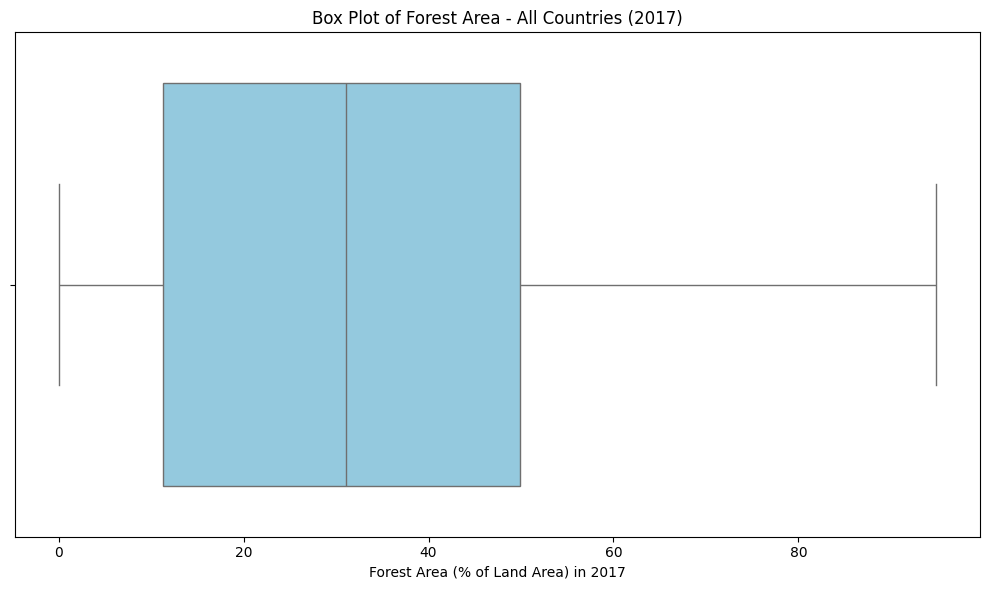

In [103]:
countries = []
forest_areas = []

with open("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()[5:]  # skip metadata and header

    for line in lines:
        parts = line.strip().split(",")

        if len(parts) > 61:
            country = parts[0].replace('""', '').replace('"', '').strip()
            value = parts[61].replace('""', '').replace('"', '').strip()

            if value and not any(keyword.lower() in country.lower() for keyword in [
                "World", "income", "region", "developing", "countries", "Africa", "Europe",
                "Asia", "Middle East", "Arab", "Caribbean", "Pacific", "Sub-Saharan", "OECD"
            ]):
                try:
                    forest_areas.append(float(value))
                    countries.append(country)
                except ValueError:
                    print(f"Could not parse: {country} → {value}")

# Plot boxplot
if forest_areas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=forest_areas, color="skyblue")
    plt.xlabel("Forest Area (% of Land Area) in 2017")
    plt.title("Box Plot of Forest Area - All Countries (2017)")
    plt.tight_layout()
    plt.show()


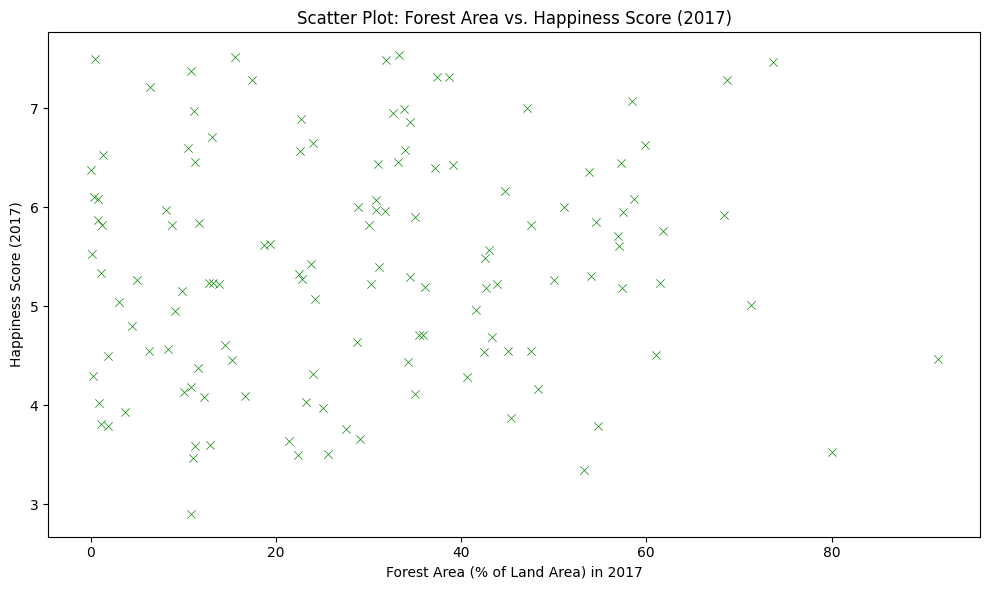

In [63]:

forest_df = pd.read_csv("Forest_Area_2017_Countries.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

merged_df = pd.merge(happiness_df, forest_df, left_on="Country", right_on="Country Name")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="2017", y="Happiness.Score",marker="x",color="green")
plt.xlabel("Forest Area (% of Land Area) in 2017")
plt.ylabel("Happiness Score (2017)")
plt.title("Scatter Plot: Forest Area vs. Happiness Score (2017)")
plt.tight_layout()
plt.show()


<ipython-input-65-f544ec1ed520>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=grouped, x="Label", y="2017", order=sorted_labels, palette="viridis")


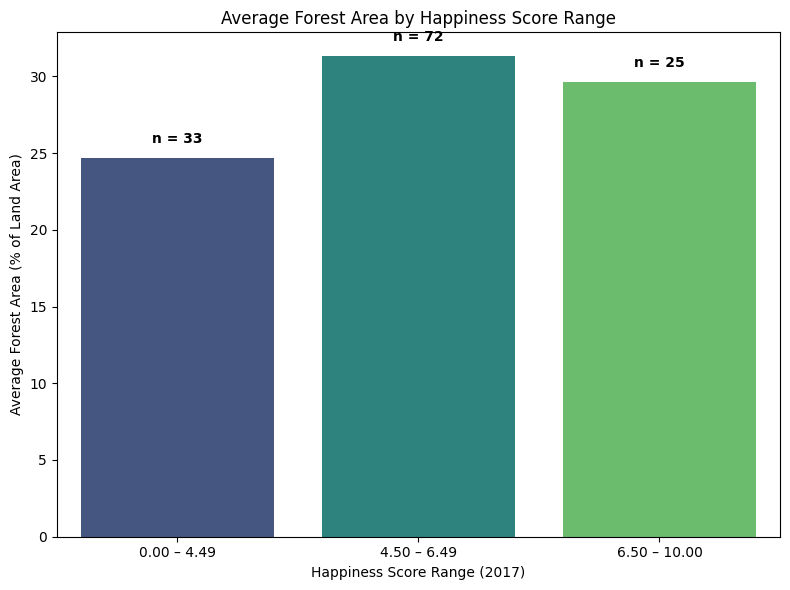

In [65]:

forest_df = pd.read_csv("Forest_Area_2017_Countries.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

merged_df = pd.merge(happiness_df, forest_df, left_on="Country", right_on="Country Name")

def categorize_happiness(score):
    if score < 4.5:
        return "Low"
    elif score < 6.5:
        return "Medium"
    else:
        return "High"

merged_df["Happiness Category"] = merged_df["Happiness.Score"].apply(categorize_happiness)

grouped = merged_df.groupby("Happiness Category")["2017"].mean().reset_index()
grouped["Label"] = grouped["Happiness Category"].map({
    "Low": "0.00 – 4.49",
    "Medium": "4.50 – 6.49",
    "High": "6.50 – 10.00"
})

sorted_labels = ["0.00 – 4.49", "4.50 – 6.49", "6.50 – 10.00"]
category_order = ["Low", "Medium", "High"]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=grouped, x="Label", y="2017", order=sorted_labels, palette="viridis")

for i, label in enumerate(sorted_labels):
    val = grouped[grouped["Label"] == label]["2017"].values[0]
    count = merged_df[merged_df["Happiness Category"] == category_order[i]].shape[0]
    barplot.text(i, val + 1, f"n = {count}", ha='center', fontweight='bold')

plt.ylabel("Average Forest Area (% of Land Area)")
plt.xlabel("Happiness Score Range (2017)")
plt.title("Average Forest Area by Happiness Score Range")
plt.tight_layout()
plt.show()


# AIR POLLUTION DATA VISUALIZATION

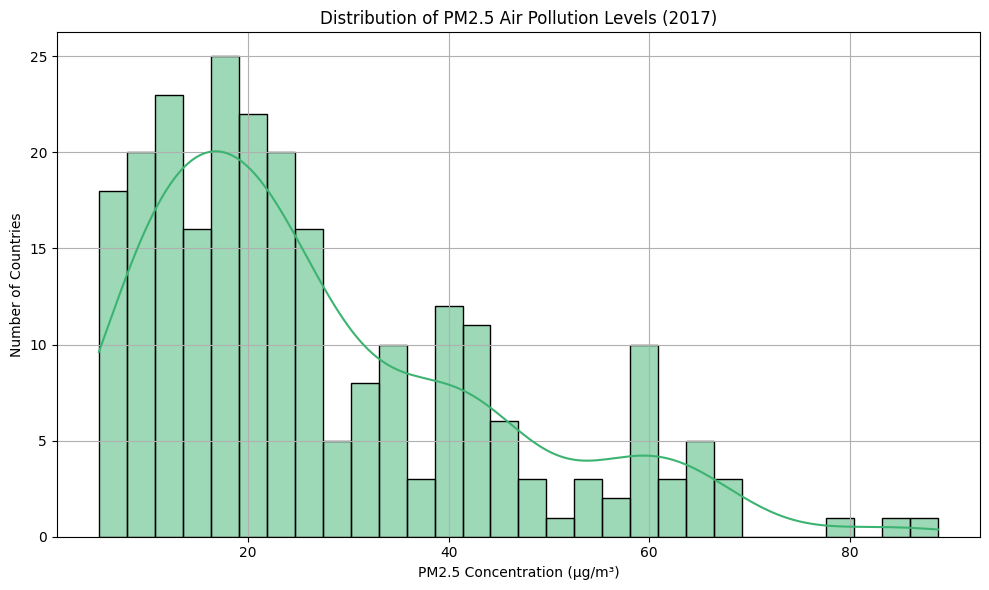

,PM2.5_2017
count,248.000000
mean,27.063164
std,17.321239
min,5.126740
25%,13.628277
50%,21.859972
75%,38.526716
max,88.787883


In [66]:


df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")

plt.figure(figsize=(10, 6))
sns.histplot(df_pm25['PM2.5_2017'], kde=True, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of PM2.5 Air Pollution Levels (2017)')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

df_pm25.describe()


<ipython-input-67-e631ac271d00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pollution_Level', y='PM2.5_2017', data=df_pm25, palette='Blues')


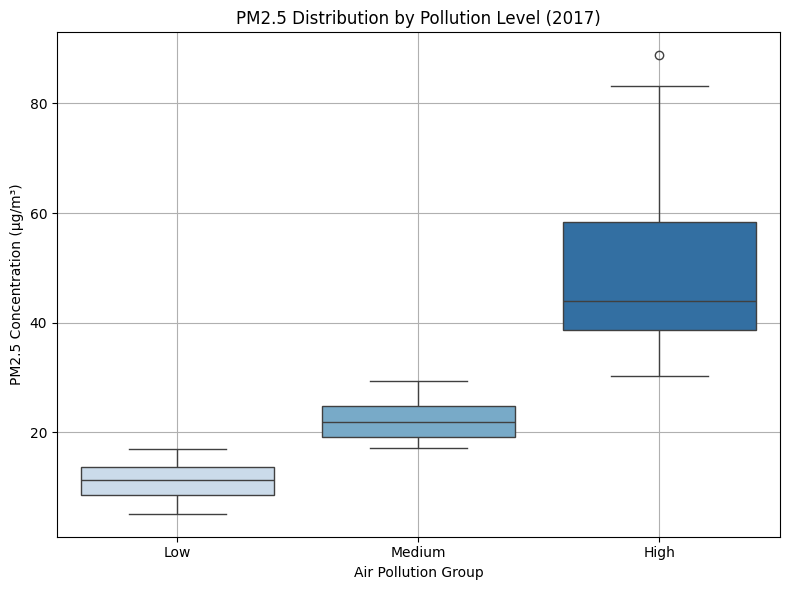

In [67]:
df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")
df_pm25['Pollution_Level'] = pd.qcut(df_pm25['PM2.5_2017'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pollution_Level', y='PM2.5_2017', data=df_pm25, palette='Blues')
plt.title('PM2.5 Distribution by Pollution Level (2017)')
plt.xlabel('Air Pollution Group')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:

df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")

df_pm25_map = df_pm25.copy()
df_pm25_map.columns = ['Country', 'PM2.5']

fig = px.choropleth(
    df_pm25_map,
    locations='Country',
    locationmode='country names',
    color='PM2.5',
    color_continuous_scale='YlOrRd',
    title='Global PM2.5 Air Pollution Levels (2017)',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


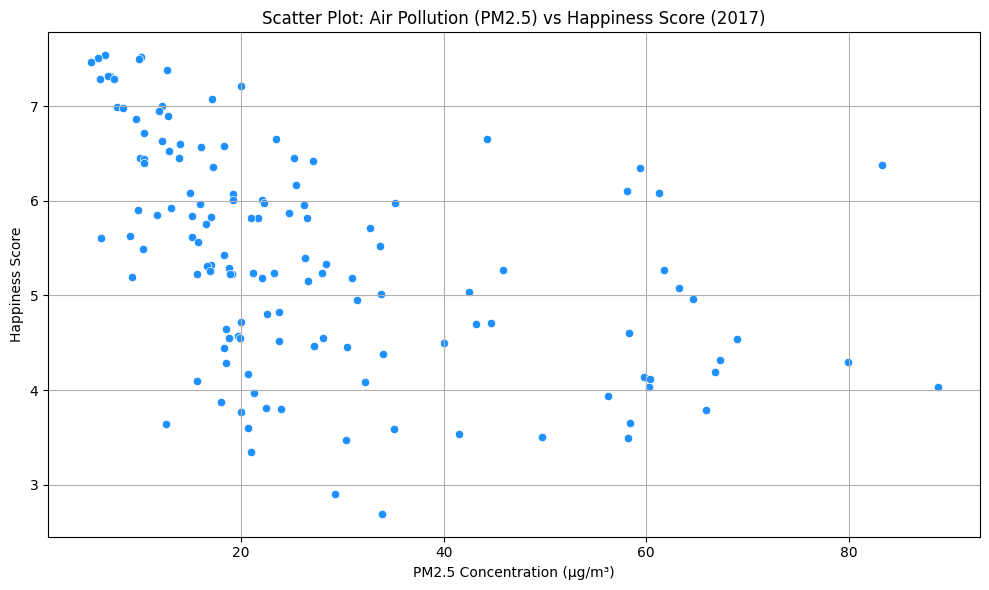

In [76]:


# Scatter plot: PM2.5 vs Happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PM2.5_2017',
    y='Happiness.Score',
    data=merged_df,
    color='dodgerblue'
)

plt.title('Scatter Plot: Air Pollution (PM2.5) vs Happiness Score (2017)')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()


# COASTLINE DATA VISUALIZATION

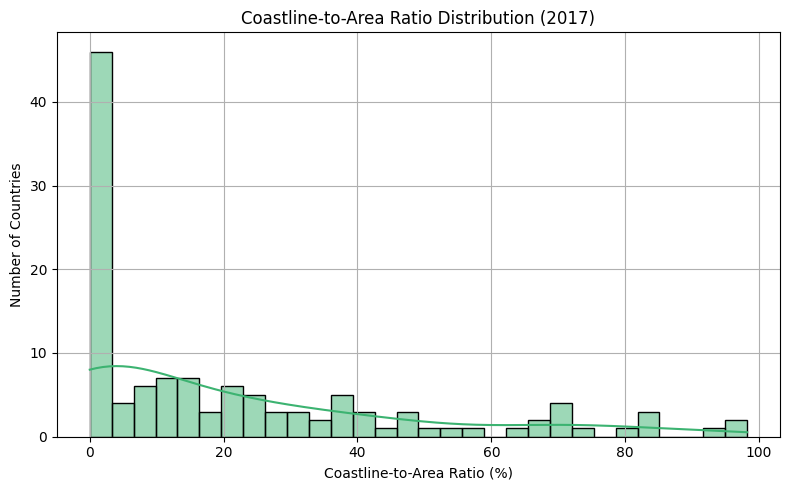

In [78]:


df = pd.read_csv("coastlines.csv")
df["coast_ratio"] = df["coast_to_area_wf"] * 100
df = df.dropna(subset=["coast_ratio"])
df = df[df["coast_ratio"] <= 100]

plt.figure(figsize=(8, 5))
sns.histplot(df["coast_ratio"], bins=30, kde=True, color="mediumseagreen", edgecolor="black")
plt.xlabel("Coastline-to-Area Ratio (%)")
plt.ylabel("Number of Countries")
plt.title("Coastline-to-Area Ratio Distribution (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


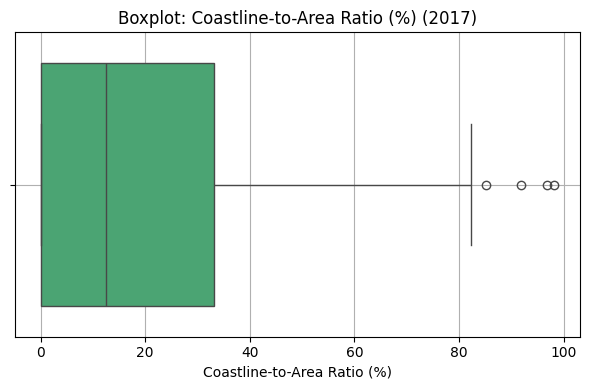

In [79]:


plt.figure(figsize=(6, 4))
sns.boxplot(x=df["coast_ratio"], color="mediumseagreen")
plt.xlabel("Coastline-to-Area Ratio (%)")
plt.title("Boxplot: Coastline-to-Area Ratio (%) (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


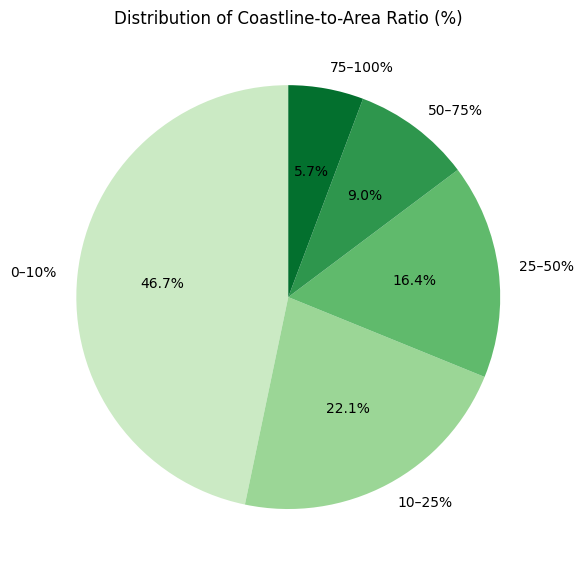

In [80]:

df = pd.read_csv("coastlines.csv")
df["coast_ratio"] = df["coast_to_area_wf"] * 100
df = df.dropna(subset=["coast_ratio"])

bins = [0, 10, 25, 50, 75, 100]
labels = ["0–10%", "10–25%", "25–50%", "50–75%", "75–100%"]
df["coast_bin"] = pd.cut(df["coast_ratio"], bins=bins, labels=labels, include_lowest=True)

counts = df["coast_bin"].value_counts().sort_index()

plt.figure(figsize=(6, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Greens(range(60, 260, 40)))
plt.ylabel("")
plt.title("Distribution of Coastline-to-Area Ratio (%)")
plt.tight_layout()
plt.show()


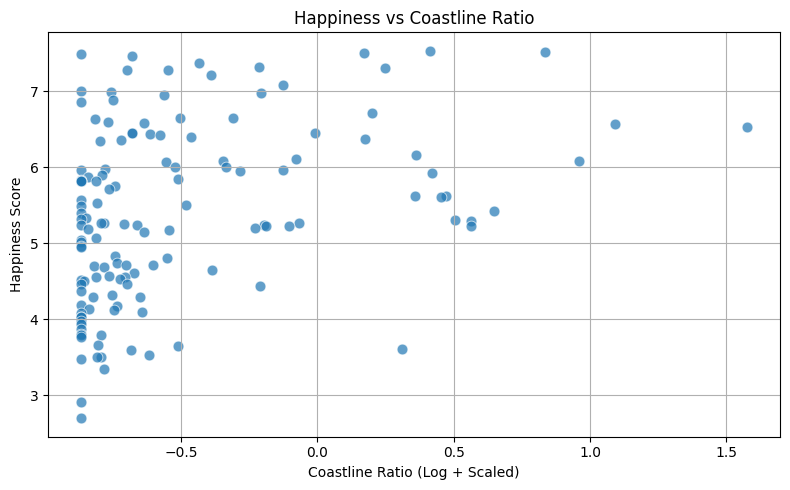

In [87]:


coast_df = pd.read_csv("coastlines.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

coast_df = coast_df[["Country", "coast_to_area_wf"]].dropna()
coast_df.columns = ["Country", "coast_ratio"]
coast_df["coast_log"] = np.log1p(coast_df["coast_ratio"])
scaler = StandardScaler()
coast_df["coast_log_scaled"] = scaler.fit_transform(coast_df[["coast_log"]])

merged = happiness_df.merge(coast_df, on="Country", how="inner")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged["coast_log_scaled"], y=merged["Happiness.Score"], s=60, alpha=0.7)
plt.xlabel("Coastline Ratio (Log + Scaled)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs Coastline Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-89-6afcc474cc8b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-89-6afcc474cc8b>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




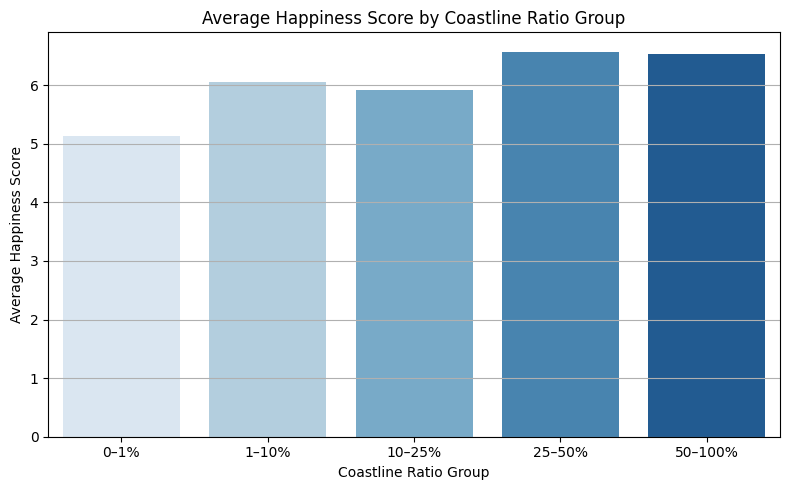

In [89]:


coast_df = pd.read_csv("coastlines.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

coast_df = coast_df[["Country", "coast_to_area_wf"]].dropna()
coast_df.columns = ["Country", "coast_ratio"]

bins = [0, 1, 10, 25, 50, 100]
labels = ["0–1%", "1–10%", "10–25%", "25–50%", "50–100%"]
coast_df["coast_group"] = pd.cut(coast_df["coast_ratio"], bins=bins, labels=labels, include_lowest=True)

merged = happiness_df.merge(coast_df, on="Country", how="inner")
grouped = merged.groupby("coast_group")["Happiness.Score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="coast_group", y="Happiness.Score", palette="Blues")
plt.xlabel("Coastline Ratio Group")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Coastline Ratio Group")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# ARABLE LAND DATA VISUALIZATION

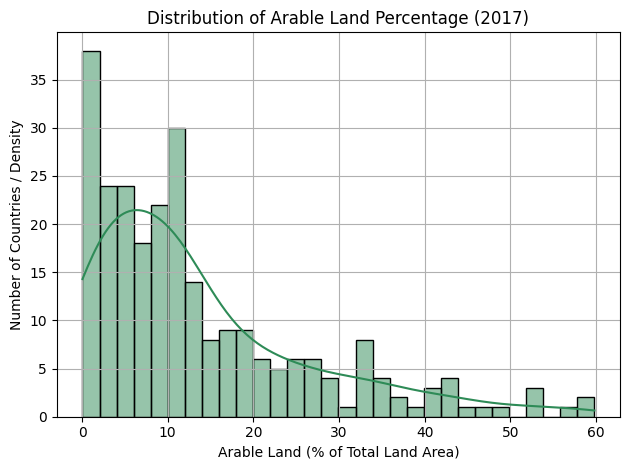

In [90]:


df = pd.read_csv("arable_land_2017.csv")

sns.histplot(df["arable_land_percent"], bins=30, kde=True, color="seagreen", edgecolor="black")
plt.xlabel("Arable Land (% of Total Land Area)")
plt.ylabel("Number of Countries / Density")
plt.title("Distribution of Arable Land Percentage (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


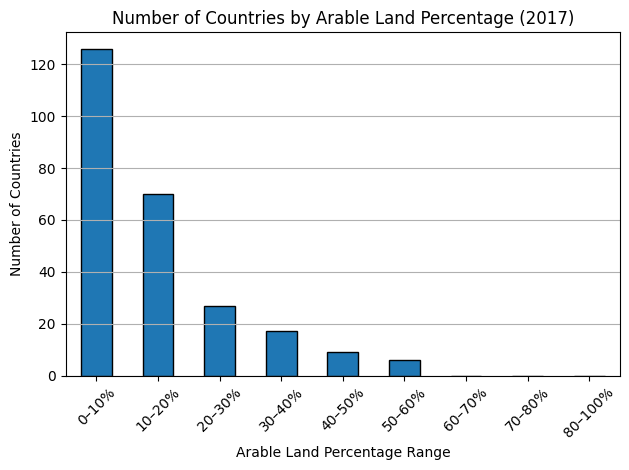

In [91]:

df = pd.read_csv("arable_land_2017.csv")

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–40%", "40–50%", "50–60%", "60–70%", "70–80%", "80–100%"]
df["arable_bin"] = pd.cut(df["arable_land_percent"], bins=bins, labels=labels, include_lowest=True)

counts = df["arable_bin"].value_counts().sort_index()

counts.plot(kind="bar", edgecolor="black")
plt.xlabel("Arable Land Percentage Range")
plt.ylabel("Number of Countries")
plt.title("Number of Countries by Arable Land Percentage (2017)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


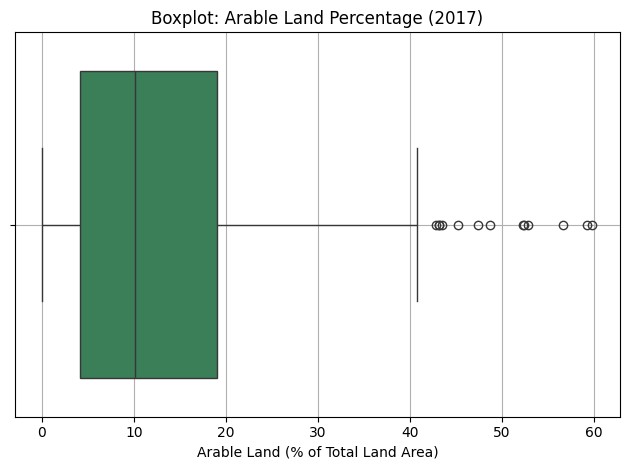

In [92]:

sns.boxplot(x=df["arable_land_percent"], color="seagreen")
plt.xlabel("Arable Land (% of Total Land Area)")
plt.title("Boxplot: Arable Land Percentage (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


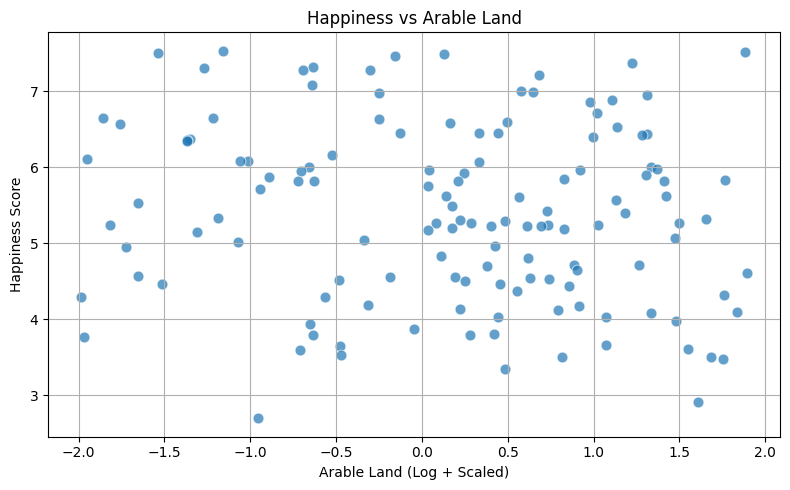

In [93]:

arable_df = pd.read_csv("arable_land_2017.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

arable_df["arable_log"] = np.log1p(arable_df["arable_land_percent"])
scaler = StandardScaler()
arable_df["arable_log_scaled"] = scaler.fit_transform(arable_df[["arable_log"]])

merged = happiness_df.merge(arable_df, left_on="Country", right_on="country", how="inner")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged["arable_log_scaled"], y=merged["Happiness.Score"], s=60, alpha=0.7)
plt.xlabel("Arable Land (Log + Scaled)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs Arable Land")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-94-85d2016db6f2>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-94-85d2016db6f2>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




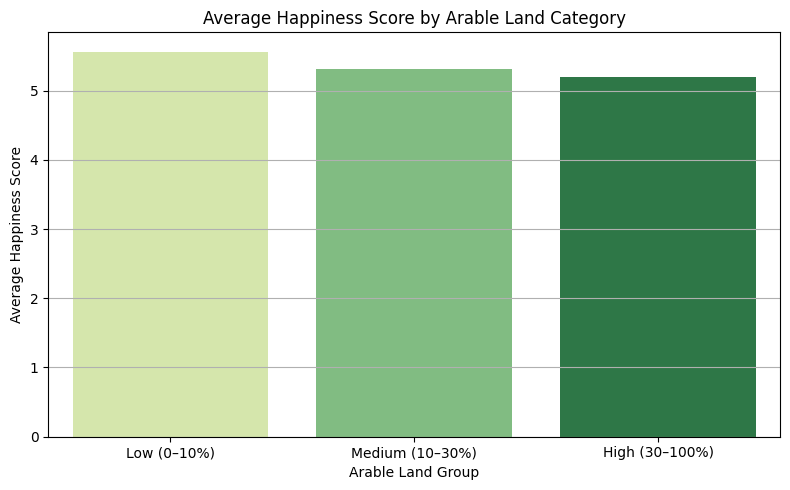

In [94]:


arable_df = pd.read_csv("arable_land_2017.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

bins = [0, 10, 30, 100]
labels = ["Low (0–10%)", "Medium (10–30%)", "High (30–100%)"]
arable_df["arable_group"] = pd.cut(arable_df["arable_land_percent"], bins=bins, labels=labels, include_lowest=True)

merged = happiness_df.merge(arable_df, left_on="Country", right_on="country", how="inner")
grouped = merged.groupby("arable_group")["Happiness.Score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="arable_group", y="Happiness.Score", palette="YlGn")
plt.xlabel("Arable Land Group")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Arable Land Category")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
